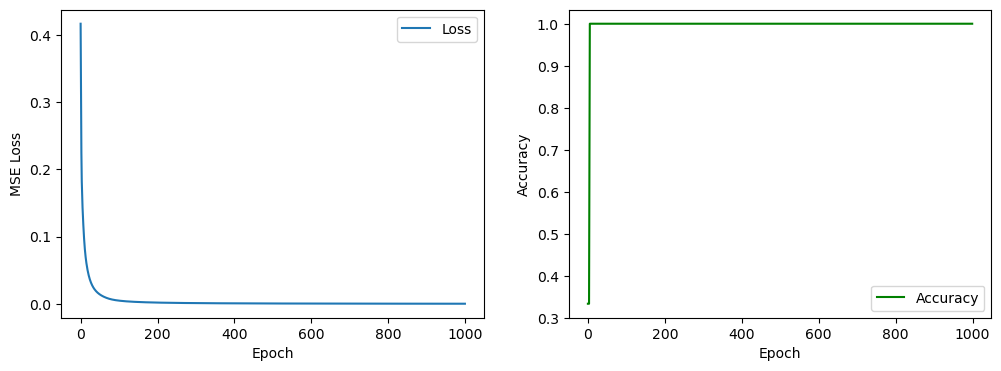

Predicted class: 1
True class: 1


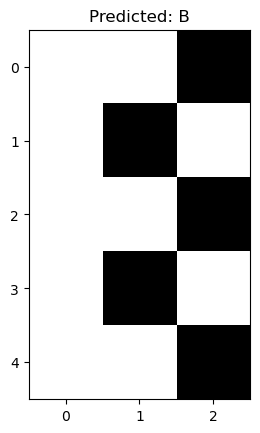

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0,1,0],
              [1,0,1],
              [1,1,1],
              [1,0,1],
              [1,0,1]])

B = np.array([[1,1,0],
              [1,0,1],
              [1,1,0],
              [1,0,1],
              [1,1,0]])

C = np.array([[0,1,1],
              [1,0,0],
              [1,0,0],
              [1,0,0],
              [0,1,1]])

letters = [A, B, C]
labels = np.eye(3)

X = np.array([l.flatten() for l in letters])
y = labels

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

input_size = X.shape[1]
hidden_size = 10
output_size = 3
lr = 0.5
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses, accuracies = [], []

for epoch in range(epochs):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = sigmoid(z2)

    loss = mse_loss(y, y_pred)
    losses.append(loss)

    preds = np.argmax(y_pred, axis=1)
    true = np.argmax(y, axis=1)
    acc = np.mean(preds == true)
    accuracies.append(acc)

    error = y_pred - y
    dW2 = a1.T @ (error * sigmoid_derivative(y_pred))
    db2 = np.sum(error * sigmoid_derivative(y_pred), axis=0, keepdims=True)

    hidden_error = (error @ W2.T) * sigmoid_derivative(a1)
    dW1 = X.T @ hidden_error
    db1 = np.sum(hidden_error, axis=0, keepdims=True)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracies, label="Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

test_index = 1
test_input = X[test_index].reshape(1, -1)
z1 = test_input @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
output = sigmoid(z2)

print("Predicted class:", np.argmax(output))
print("True class:", test_index)

plt.imshow(letters[test_index], cmap="gray")
plt.title(f"Predicted: {['A','B','C'][np.argmax(output)]}")
plt.show()
